### UDP介绍
UDP --- 用户数据报协议，是一个无连接的简单的面向数据报的运输层协议。UDP不提供可靠性，它只是把应用程序传给IP层的数据报发送出去，但是并不能保证它们能到达目的地。由于UDP在传输数据报前不用在客户和服务器之间建立一个连接，且没有超时重发等机制，故而传输速度很快。

UDP是一种面向无连接的协议，每个数据报都是一个独立的信息，包括完整的源地址或目的地址，它在网络上以任何可能的路径传往目的地，因此能否到达目的地，到达目的地的时间以及内容的正确性都是不能被保证的。

### UDP特点：
UDP是面向无连接的通讯协议，UDP数据包括目的端口号和源端口号信息，由于通讯不需要连接，所以可以实现广播发送。 UDP传输数据时有大小限制，每个被传输的数据报必须限定在64KB之内。 UDP是一个不可靠的协议，发送方所发送的数据报并不一定以相同的次序到达接收方。

### 【适用情况】

UDP是面向消息的协议，通信时不需要建立连接，数据的传输自然是不可靠的，UDP一般用于多点通信和实时的数据业务，比如

* 语音广播
* 视频
* QQ
* TFTP(简单文件传送）
* SNMP（简单网络管理协议）
* RIP（路由信息协议，如报告股票市场，航空信息）
* DNS(域名解释）
* 注重速度流畅

UDP操作简单，而且仅需要较少的监护，因此通常用于局域网高可靠性的分散系统中client/server应用程序。例如视频会议系统，并不要求音频视频数据绝对的正确，只要保证连贯性就可以了，这种情况下显然使用UDP会更合理一些。

** 创建一个udp客户端程序的流程是简单，具体步骤如下：**

* 创建客户端套接字
* 发送/接收数据
* 关闭套接字

In [5]:

#coding=utf-8

from socket import *

#1. 创建套接字
udpSocket = socket(AF_INET, SOCK_DGRAM)#UDP协议

#2. 准备接收方的地址

sendAddr = ('192.168.8.213', 7777)

#3. 从键盘获取数据
sendData = input("请输入要发送的数据:")

#4. 发送数据到指定的电脑上
#第一个参数是二进制对象，要将字符串转换为二进制对象，需要使用encode方法，根据对方接收什么编码，进行解码。
udpSocket.sendto(sendData.encode('gbk'), sendAddr)

#5. 关闭套接字
udpSocket.close()

请输入要发送的数据:大吉大利，晚上吃鸡


In [2]:
##创建udp网络程序-接收数据
#coding=utf-8

from socket import *

#1. 创建套接字
udpSocket = socket(AF_INET, SOCK_DGRAM)

#2. 准备接收方的地址
sendAddr = ('192.168.8.213', 7777)

#3. 从键盘获取数据
sendData = input("请输入要发送的数据:")

#4. 发送数据到指定的电脑上
udpSocket.sendto(sendData.encode('gbk'), sendAddr)

#5. 等待接收对方发送的数据
recvData = udpSocket.recvfrom(1024) # 1024表示本次接收的最大字节数

#6. 显示对方发送的数据
# print(recvData)
#将二进制对象转为字符串，这个时候用decode（）,根据对方用什么编码，你就用什么解码
print('发送方%s,端口号%s:%s'%(recvData[1][0],recvData[1][1],recvData[0].decode('gbk')))

#7. 关闭套接字
udpSocket.close()

请输入要发送的数据:你好，今晚不玩游戏，好好学习
发送方192.168.8.213,端口号7777:你说的对！


In [2]:
#udp绑定端口号
#coding=utf-8

from socket import *

#1. 创建套接字
udpSocket = socket(AF_INET, SOCK_DGRAM)

#2. 绑定本地的相关信息，如果一个网络程序不绑定，则系统会随机分配

bindAddr = ('', 6666) # ip地址和端口号，ip一般不用写，表示本机的任何一个ip

udpSocket.bind(bindAddr)

n = 10
while n>0:
    #3. 等待接收对方发送的数据
    recvData = udpSocket.recvfrom(1024) # 1024表示本次接收的最大字节数

    #4. 显示接收到的数据
    print('发送方%s,端口号%s:%s'%(recvData[1][0],recvData[1][1],recvData[0].decode('gbk')))
    n= n-1

#5. 关闭套接字
udpSocket.close()

发送方192.168.8.213,端口号7777:你说了啥。。
发送方192.168.8.213,端口号7777:鱼香肉丝
发送方192.168.8.213,端口号7777:1
发送方192.168.8.213,端口号7777:12
发送方192.168.8.213,端口号7777:12
发送方192.168.8.213,端口号7777:124
发送方192.168.8.213,端口号7777:1244
发送方192.168.8.213,端口号7777:12445
发送方192.168.8.213,端口号7777:124456
发送方192.168.8.213,端口号7777:1244566


In [10]:
%%writefile client.py
#循环发送
#coding=utf-8

from socket import *

#1. 创建套接字
udpSocket = socket(AF_INET, SOCK_DGRAM)#UDP协议

#2. 准备接收方的地址

sendAddr = ('192.168.8.213', 6666)
bindAddr = ('', 7777) # ip地址和端口号，ip一般不用写，表示本机的任何一个ip
#发送方也可以绑定
udpSocket.bind(bindAddr)


while True:
    #3. 从键盘获取数据
    sendData = input("请输入要发送的数据:")

    #4. 发送数据到指定的电脑上
    #第一个参数是二进制对象，要将字符串转换为二进制对象，需要使用encode方法，根据对方接收什么编码，进行解码。
    udpSocket.sendto(sendData.encode('gbk'), sendAddr)
    recvData = udpSocket.recvfrom(1024)
    print('发送方%s,端口号%s:%s'%(recvData[1][0],recvData[1][1],recvData[0].decode('gbk')))

#5. 关闭套接字
udpSocket.close()

Overwriting client.py


In [12]:
%%writefile server.py

#udp绑定端口号
#coding=utf-8

from socket import *

#1. 创建套接字
udpSocket = socket(AF_INET, SOCK_DGRAM)

#2. 绑定本地的相关信息，如果一个网络程序不绑定，则系统会随机分配

bindAddr = ('', 6666) # ip地址和端口号，ip一般不用写，表示本机的任何一个ip

udpSocket.bind(bindAddr)

n = 10
while n>0:
    #3. 等待接收对方发送的数据
    recvData = udpSocket.recvfrom(1024) # 1024表示本次接收的最大字节数

    #4. 显示接收到的数据
    print('发送方%s,端口号%s:%s'%(recvData[1][0],recvData[1][1],recvData[0].decode('gbk')))
    s = '服务器已收到了：%s'%recvData[0].decode('gbk')
    print( type(recvData[1][0]))
    print(recvData[1][1])
    udpSocket.sendto(s.encode('gbk'),(recvData[1][0],recvData[1][1]))
    n= n-1

#5. 关闭套接字
udpSocket.close()

Overwriting server.py


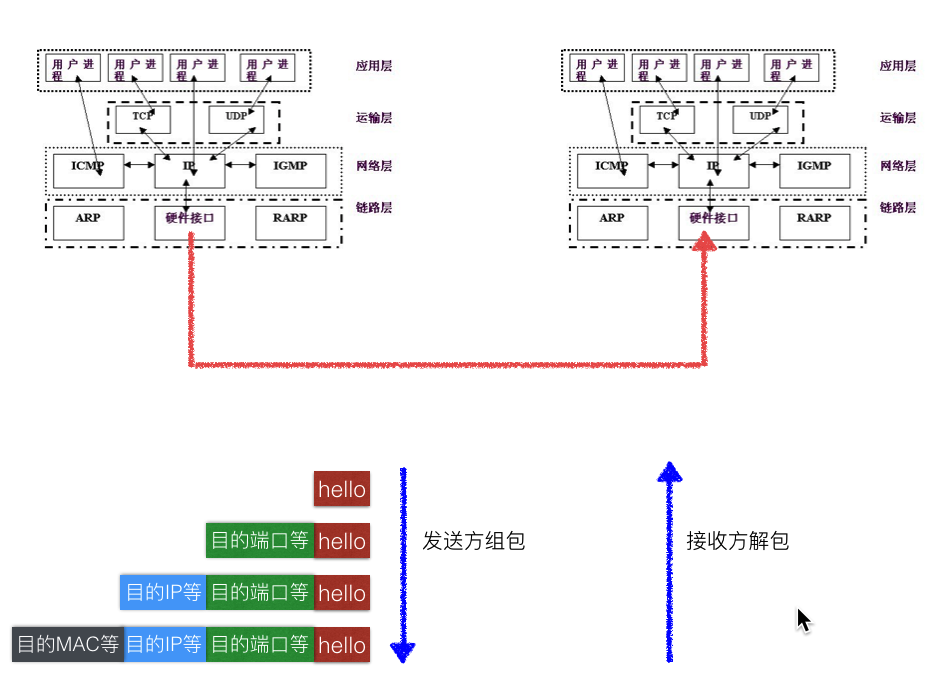

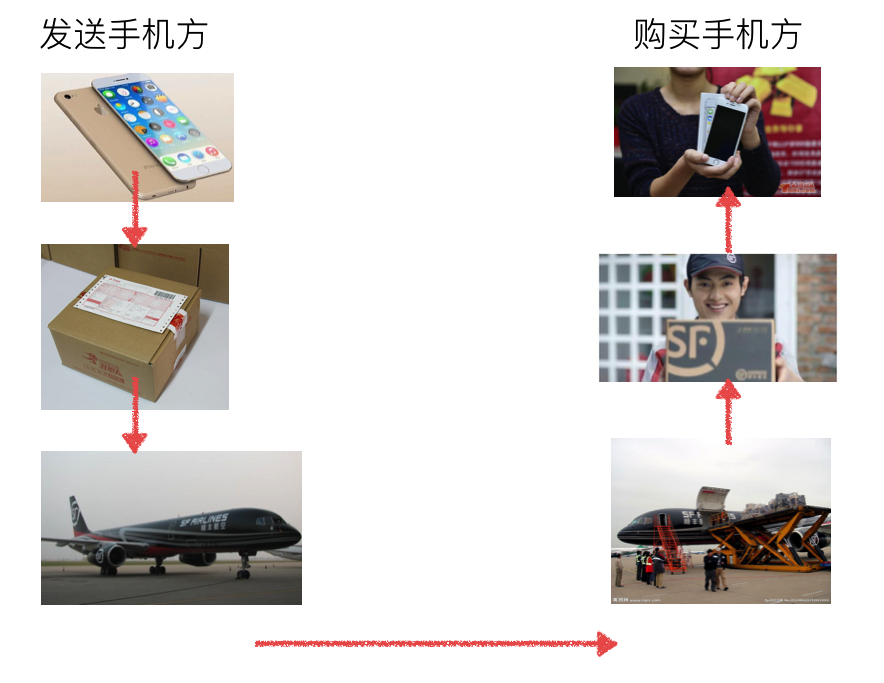